<a href="https://colab.research.google.com/github/yunyaopan/data_analytics_SG_tech_job_market/blob/main/SGtechJobMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#importing the necessary libraries
import requests
import json
import matplotlib.pyplot as plt

#initializing page number
page = 1

#initializing the list to store all the responses
jobs_list = []
print('loaded data from these page numbers')

#loop to iterate through all the pages
while True:
    #requesting the data from the API
    r = requests.get(f"https://nodeflair.com/api/v2/jobs?query=&page={page}&sort_by=relevant&countries%5B%5D=Singapore")
    #adding the response to the list
    jobs_list.append(r.json())
    print(page,end=', ')
    #terminating the loop if the job_listings is empty
    if len(r.json()["job_listings"]) == 0:
        break
    page += 1

#initializing a dictionary to store the number of jobs for each position
positions = {}

#iterating through the list to count the number of jobs for each position
for job in jobs_list:
    for job_listing in job["job_listings"]:
        position = job_listing["position"]
        if position in positions:
            positions[position] += 1
        else:
            positions[position] = 1

loaded data from these page numbers
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

In [34]:
# Sort the dictionary by value in decreasing order
sorted_positions_tuple = sorted(positions.items(), key=lambda x: x[1])
sorted_positions = dict(sorted_positions_tuple)

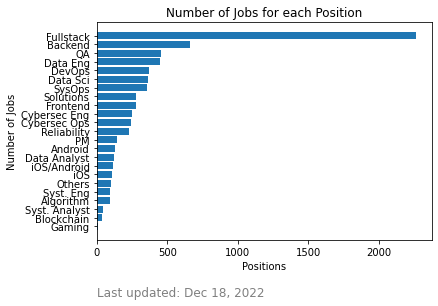

In [49]:
import datetime

#plotting the bar chart
plt.barh(list(sorted_positions.keys()), list(sorted_positions.values()))
plt.xlabel("Positions")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs for each Position")

# Add a side note with the current date
today = datetime.datetime.now().strftime('%b %d, %Y')
plt.text(0, -8, 'Last updated: ' + today, fontsize=12, color='gray')

plt.show()